## Simple data exploration methods being used to dissect the Churn dataset. 
## End goal is to make predictions based on data from the most effective features.
## This is completed using Logistic Regression. Results and Accuracry are shown by graphs and ROC curve

In [92]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Read the dataset "churn.csv" 
#### Save it in a variable called "df"
#### Extract basic information about the data.

In [93]:
df = pd.read_csv("churn.csv")

In [94]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [97]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
df.shape

(7043, 21)

#### Cast the feature "TotalCharges" to a float. 
#### Delete rows, including null values, and drop the \CustomerID" column. 
#### Replace relevant columns to integers. For "Gender", use 1 for "Male" and 0 for "Female". 
#### For the others, use 1 for "Yes" and 0 for "No".

In [99]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors ="coerce")

In [100]:
df.dropna(inplace=True)

In [101]:
df.drop(["customerID"], axis=1, inplace=True)

In [102]:
df.gender = [1 if value == "Male" else 0 for value in df.gender]

In [103]:
columns_to_convert = ["Partner",
                      "Dependents",
                      "PhoneService",
                      "MultipleLines",
                      "OnlineSecurity",
                      "OnlineBackup",
                      "DeviceProtection",
                      "TechSupport",
                      "StreamingTV",
                      "StreamingMovies",
                      "PaperlessBilling",
                      "Churn"]


In [104]:
for value in columns_to_convert:
    df[value] = [1 if value == "Yes" else 0 if value == "No" else -1 for value in df[value]]

#### Perform a univariate analysis for all categorical and continuous variables. 
#### Plot their distributions using histograms in seaborn. 
#### Then create a "pairplot" for the columns "tenure", "MonthlyCharges" and "TotalCharges" with the hue="Churn".

In [105]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [106]:
numeric_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

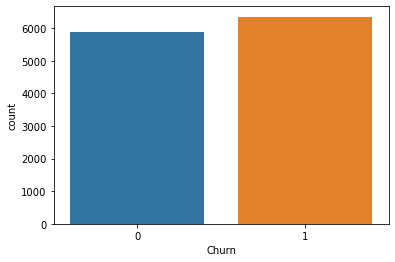

In [107]:
for column in numeric_columns:
    sns.countplot(column,data=df)
plt.show()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

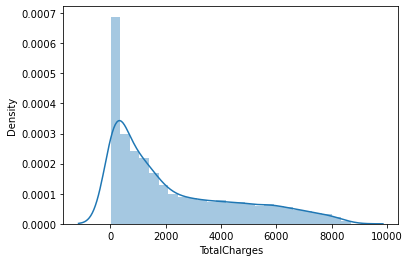

In [108]:
sns.distplot(df["TotalCharges"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

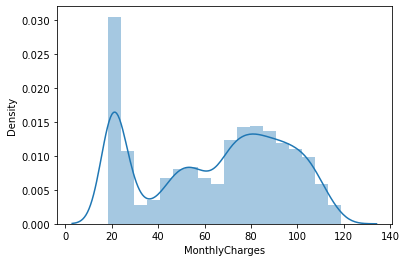

In [109]:
sns.distplot(df["MonthlyCharges"])


In [110]:
object_columns = df.select_dtypes(include=np.object).columns.tolist()

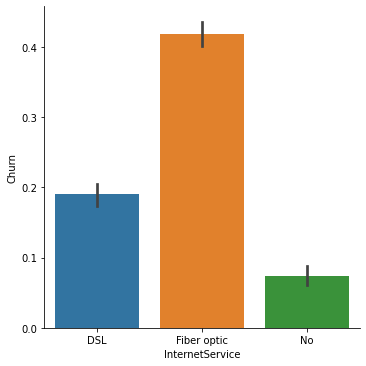

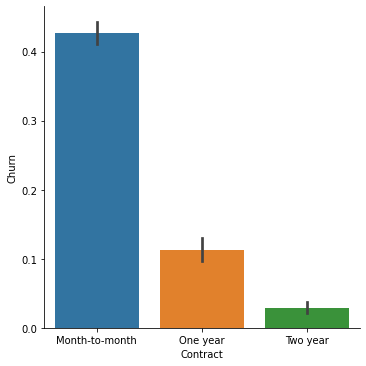

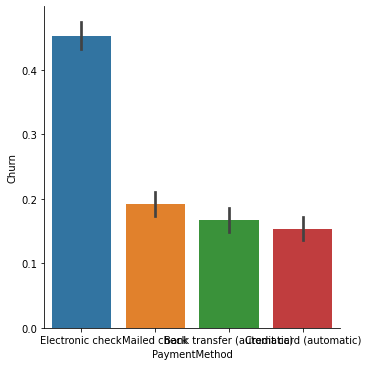

In [111]:
for column in object_columns:
    sns.catplot(x=column, y="Churn", data=df, kind="bar")
   
plt.show()

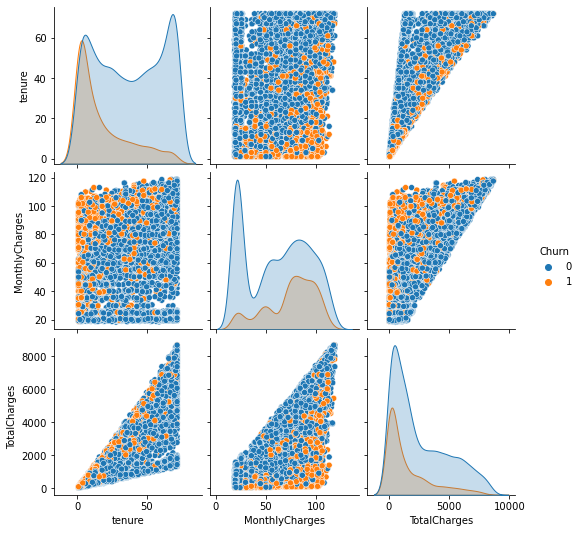

In [112]:
sns.pairplot(df, vars=["tenure","MonthlyCharges", "TotalCharges"], hue="Churn")

##### Plot the correlation matrix between "Churn" and the remaining columns.

In [113]:
corr = df.corr()["Churn"].sort_values()

In [114]:
corr

tenure             -0.354049
TotalCharges       -0.199484
Dependents         -0.163128
Partner            -0.149982
gender             -0.008545
PhoneService        0.011691
OnlineSecurity      0.023014
TechSupport         0.026744
MultipleLines       0.036148
OnlineBackup        0.073934
DeviceProtection    0.084402
SeniorCitizen       0.150541
StreamingMovies     0.162672
StreamingTV         0.164509
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

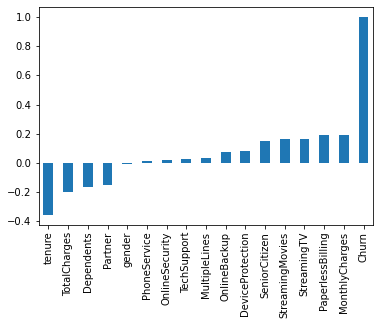

In [115]:
corr.plot(kind="bar")

#### Seperate X and y values.
#### Apply normalization to X in order to scale all values between 0 and 1.

In [116]:
df = pd.get_dummies(data=df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [117]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [118]:
y = df.Churn.values

X = df.drop(["Churn"], axis=1)

X = (X-np.min(X)) / (np.max(X) - np.min(X)).values


In [119]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.5,1.0,0.5,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.5,1.0,1.0,0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.5,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.5,0.5,0.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.5,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.5,0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.5,0.5,0.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Use the RFE method to get the best 10 variables for predicting the Churn. 
#### Transform the data to only use those variables for predicting. 
#### Split the data set as train and test with %80-%20 ratio.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [121]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X,y)


RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [122]:
print(sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

[(1, 'Contract_Month-to-month'), (1, 'Contract_Two year'), (1, 'InternetService_Fiber optic'), (1, 'InternetService_No'), (1, 'OnlineSecurity'), (1, 'StreamingMovies'), (1, 'StreamingTV'), (1, 'TechSupport'), (1, 'TotalCharges'), (1, 'tenure'), (2, 'PhoneService'), (3, 'MonthlyCharges'), (4, 'MultipleLines'), (5, 'PaymentMethod_Electronic check'), (6, 'PaperlessBilling'), (7, 'OnlineBackup'), (8, 'SeniorCitizen'), (9, 'Dependents'), (10, 'PaymentMethod_Credit card (automatic)'), (11, 'InternetService_DSL'), (12, 'PaymentMethod_Mailed check'), (13, 'PaymentMethod_Bank transfer (automatic)'), (14, 'DeviceProtection'), (15, 'gender'), (16, 'Partner'), (17, 'Contract_One year')]


In [123]:
X = rfe.fit_transform(X,y)

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)


#### Build a logistic regression model using the selected variables from above.¶
#### Fit it with your training data and then see the predictions in your test data.
#### Get the accuracy for your model and plot the ROC curve for it

In [127]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

print("Acc:", log_reg.score(X_test,y_test))

Acc: 0.7981520966595593


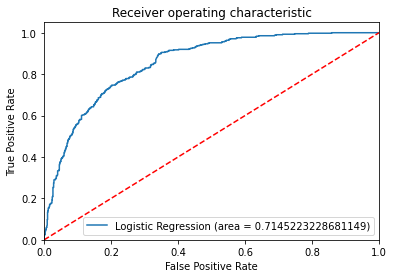

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = {})'.format(logit_roc_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
